### cafe datasets
`https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training`

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('Cafe_Sales.csv')
df.sample(5)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8281,TXN_1444479,NaN,1,3.0,3.0,Credit Card,NaN,2023-12-10
3489,TXN_8941438,Juice,4,3.0,12.0,Digital Wallet,NaN,2023-07-23
5074,TXN_2398895,Juice,5,3.0,15.0,Digital Wallet,In-store,2023-04-04
5086,TXN_5899361,Cake,1,3.0,3.0,Credit Card,NaN,2023-08-08
7070,TXN_6443522,Smoothie,4,4.0,16.0,Digital Wallet,In-store,2023-06-22


In [102]:
df.shape

(10000, 8)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [104]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [105]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [106]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [107]:
len(df)

10000

In [108]:
print(pd.__version__)

2.3.3


In [109]:
# df['Transaction ID'].idxmin()
# df.loc[df['Transaction ID'].idxmin()]

In [110]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [111]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_',regex=False)

In [112]:
df.columns

Index(['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent',
       'payment_method', 'location', 'transaction_date'],
      dtype='object')

In [113]:
df.drop_duplicates()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [114]:
df['item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [115]:
df.groupby('item')['price_per_unit'].unique()
# df[['Item','Price Per Unit']].sample(11)


item
Cake                               [3.0, nan, UNKNOWN, ERROR]
Coffee                             [2.0, nan, ERROR, UNKNOWN]
Cookie                             [1.0, UNKNOWN, nan, ERROR]
ERROR       [1.5, 3.0, 5.0, nan, 4.0, 2.0, 1.0, UNKNOWN, E...
Juice                              [3.0, nan, UNKNOWN, ERROR]
Salad                              [5.0, ERROR, UNKNOWN, nan]
Sandwich                           [4.0, nan, ERROR, UNKNOWN]
Smoothie                           [4.0, nan, UNKNOWN, ERROR]
Tea                                [1.5, nan, ERROR, UNKNOWN]
UNKNOWN     [3.0, 1.0, 5.0, 4.0, 1.5, 2.0, nan, UNKNOWN, E...
Name: price_per_unit, dtype: object

In [116]:
[df['price_per_unit']==3.0,['item']]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 9995    False
 9996    False
 9997    False
 9998    False
 9999    False
 Name: price_per_unit, Length: 10000, dtype: bool,
 ['item']]

In [117]:
df['item']=='cake'

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: item, Length: 10000, dtype: bool

In [118]:
df.iloc[9996]

transaction_id         TXN_9659401
item                           NaN
quantity                         3
price_per_unit                 NaN
total_spent                    3.0
payment_method      Digital Wallet
location                       NaN
transaction_date        2023-06-02
Name: 9996, dtype: object

In [119]:
# df['total_spent']=df['total_spent'].replace(['UNKNOWN','ERROR'],0).fillna(0).astype('float16')


In [120]:
# df['transaction_date'] = df['transaction_date'].replace(['UNKNOWN','ERROR'],np.nan).astype('datetime64[ns]')

In [121]:
invalid_values = ['UNKNOWN' ,'ERROR','None', '-']
col_clean = ['item', 'quantity', 'price_per_unit', 'total_spent',
       'payment_method', 'location', 'transaction_date']
#replacing to invalid values
for col in col_clean:
    df[col].replace(invalid_values,np.nan,inplace=True)
#changing to  datatype
for col in ['quantity', 'price_per_unit', 'total_spent']:
    df[col] = pd.to_numeric(df[col],errors='coerce')
# changing to datatype
df['transaction_date'] = pd.to_datetime(df['transaction_date'],errors='coerce')

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_2330/3850988665.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [122]:
# filling total
df['expected_total'] = df['quantity'] * df['price_per_unit']
total_missing = df['total_spent'].isnull()
df.loc[total_missing,'total_spent'] = df.loc[total_missing,'expected_total']

# filling quantity
quantity_missing = df['quantity'].isnull() & df['price_per_unit'].notna() & df['total_spent'].notna()
df.loc[quantity_missing,'quantity'] = round(df.loc[quantity_missing,'total_spent'] / (df.loc[quantity_missing,'price_per_unit'] + 1e-6))

# filling price_per_unit
price_missing = df['price_per_unit'].isnull() & df['quantity'].notna() & df['total_spent'].notna()
df.loc[price_missing,'price_per_unit'] = df.loc[price_missing,'total_spent'] / (df.loc[price_missing,'quantity'] + 1e-6)

# remove expected_total column 
df.drop(columns=['expected_total'],inplace=True)

In [123]:
#  Cleaning Categorical Columns
col_fill = ['item','payment_method', 'location',]
for col in col_fill:
    df[col] = df[col].astype(str).str.lower().str.strip()
    df[col].replace('nan',np.nan,inplace=True)

# df['location'].fillna('missing',inplace=True)
# df['payment_method'].fillna('missing',inplace=True)
df.fillna({'location': 'missing', 'payment_method': 'missing'}, inplace=True)


/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_2330/1270272367.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_2330/1270272367.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [124]:
# df['quantity'].fillna(df['quantity'].median(),inplace=True)
# df['price_per_unit'].fillna(df['price_per_unit'].median(),inplace=True)

# remaining numeric NaNs in Quantity and Price Per Unit using the Median
df.fillna({'quantity':df['quantity'].median(),'price_per_unit':df['price_per_unit'].median()},inplace=True)

#  remaining Total Spent NaNs using the newly cleaned Quantity and Price
df.fillna({'total_spent':df['quantity'] * df['price_per_unit']}, inplace=True)

In [125]:
# item
menu_map = {
    2.0: 'coffee', 1.5: 'tea', 4.0: 'sandwich', 5.0: 'salad',
    3.0: 'cake', 1.0: 'cookie', 4.0: 'smoothie', 3.0: 'juice'
}

item_missing = df['item'].isnull()
df.loc[item_missing,'item'] = df.loc[item_missing,'price_per_unit'].map(menu_map)
df.fillna({'item':'other'},inplace=True)

In [126]:
# date 
# df.sort_values(by='transaction_id',ascending=False,inplace=True)
df['transaction_date'].fillna(method='ffill',inplace=True)


/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_2330/3370017129.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_2330/3370017129.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [127]:
df['quantity'] = df['quantity'].astype(int)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    10000 non-null  object        
 1   item              10000 non-null  object        
 2   quantity          10000 non-null  int64         
 3   price_per_unit    10000 non-null  float64       
 4   total_spent       10000 non-null  float64       
 5   payment_method    10000 non-null  object        
 6   location          10000 non-null  object        
 7   transaction_date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


In [129]:
print("\n--- Cleaned Data Summary ---")
df.info()
print("\nFirst 5 rows of cleaned data:")
df.head()


--- Cleaned Data Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    10000 non-null  object        
 1   item              10000 non-null  object        
 2   quantity          10000 non-null  int64         
 3   price_per_unit    10000 non-null  float64       
 4   total_spent       10000 non-null  float64       
 5   payment_method    10000 non-null  object        
 6   location          10000 non-null  object        
 7   transaction_date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB

First 5 rows of cleaned data:


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,coffee,2,2.0,4.0,credit card,takeaway,2023-09-08
1,TXN_4977031,cake,4,3.0,12.0,cash,in-store,2023-05-16
2,TXN_4271903,cookie,4,1.0,4.0,credit card,in-store,2023-07-19
3,TXN_7034554,salad,2,5.0,10.0,missing,missing,2023-04-27
4,TXN_3160411,coffee,2,2.0,4.0,digital wallet,in-store,2023-06-11


In [130]:
df = df.dropna(how='all')

In [131]:
df.shape

(10000, 8)

In [132]:
df['transaction_date']

0      2023-09-08
1      2023-05-16
2      2023-07-19
3      2023-04-27
4      2023-06-11
          ...    
9995   2023-08-30
9996   2023-06-02
9997   2023-03-02
9998   2023-12-02
9999   2023-11-07
Name: transaction_date, Length: 10000, dtype: datetime64[ns]

In [133]:
df.shape

(10000, 8)

In [134]:
df.describe(include=['float','int'])

,quantity,price_per_unit,total_spent
count,10000.00000,10000.000000,10000.000000
mean,3.02550,2.948100,8.930750
std,1.41748,1.277329,5.997122
min,1.00000,0.999999,1.000000
25%,2.00000,2.000000,4.000000
50%,3.00000,3.000000,8.000000
75%,4.00000,4.000000,12.000000
max,5.00000,5.000000,25.000000


In [135]:
# Inspect values in categorical columns
cat_col = ['item','payment_method','location']

for col in cat_col:
    print(f"{df[col].value_counts()}\n")

item
juice       1411
smoothie    1309
coffee      1284
salad       1270
cookie      1209
tea         1199
cake        1139
sandwich    1131
other         48
Name: count, dtype: int64

payment_method
missing           3178
digital wallet    2291
credit card       2273
cash              2258
Name: count, dtype: int64

location
missing     3961
takeaway    3022
in-store    3017
Name: count, dtype: int64



#### visualization

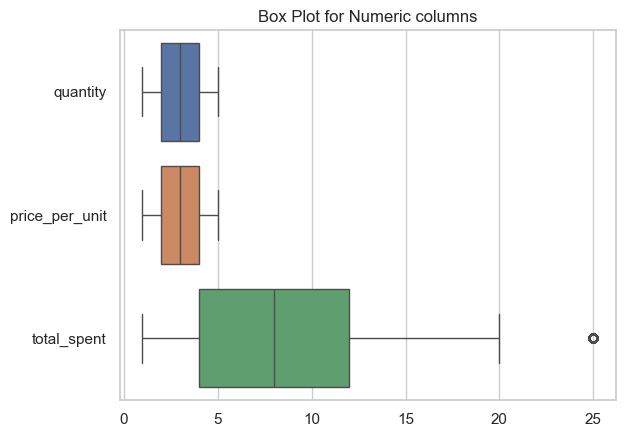

In [136]:
numeric_cols = df.select_dtypes(include=['float','int']).columns

plt.Figure(figsize=(15,4))
sns.boxplot(data=df[numeric_cols],orient='h')
plt.title('Box Plot for Numeric columns')
plt.show()

In [137]:
item_quantity = df.groupby('item')['quantity'].count()
print(item_quantity)

item
cake        1139
coffee      1284
cookie      1209
juice       1411
other         48
salad       1270
sandwich    1131
smoothie    1309
tea         1199
Name: quantity, dtype: int64


<Axes: xlabel='item', ylabel='quantity'>

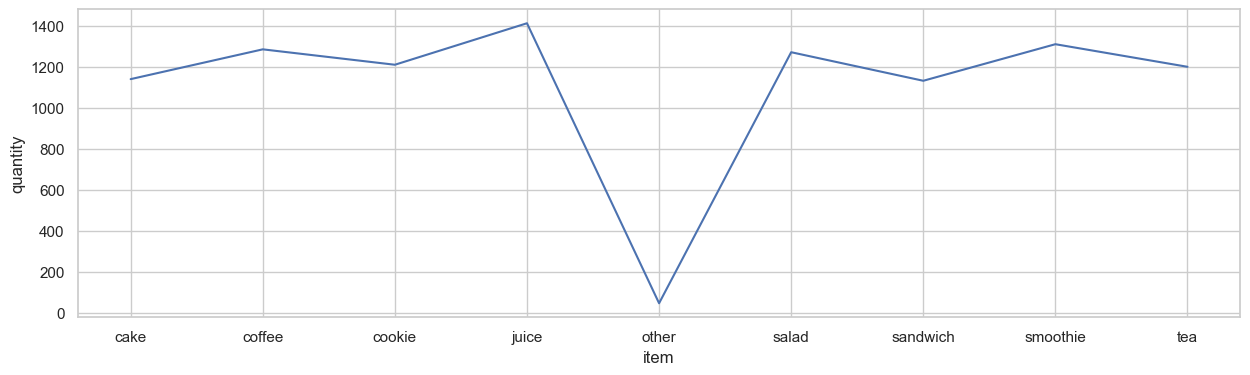

In [142]:
plt.figure(figsize=(15,4))
sns.lineplot(data=item_quantity)


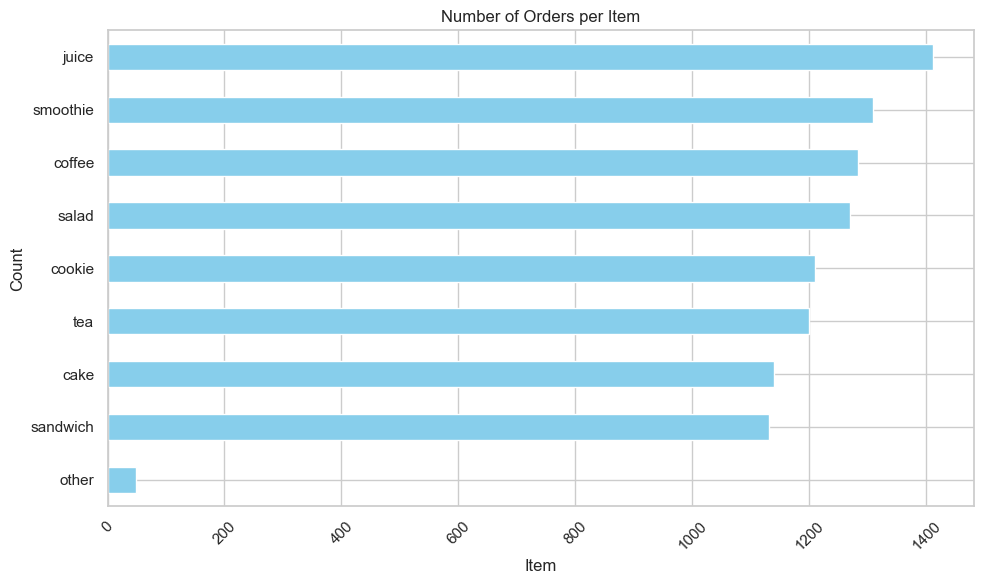

In [160]:
plt.figure(figsize=(10, 6))
item_quantity.sort_values().plot(kind='barh', color='skyblue')

plt.title('Number of Orders per Item')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

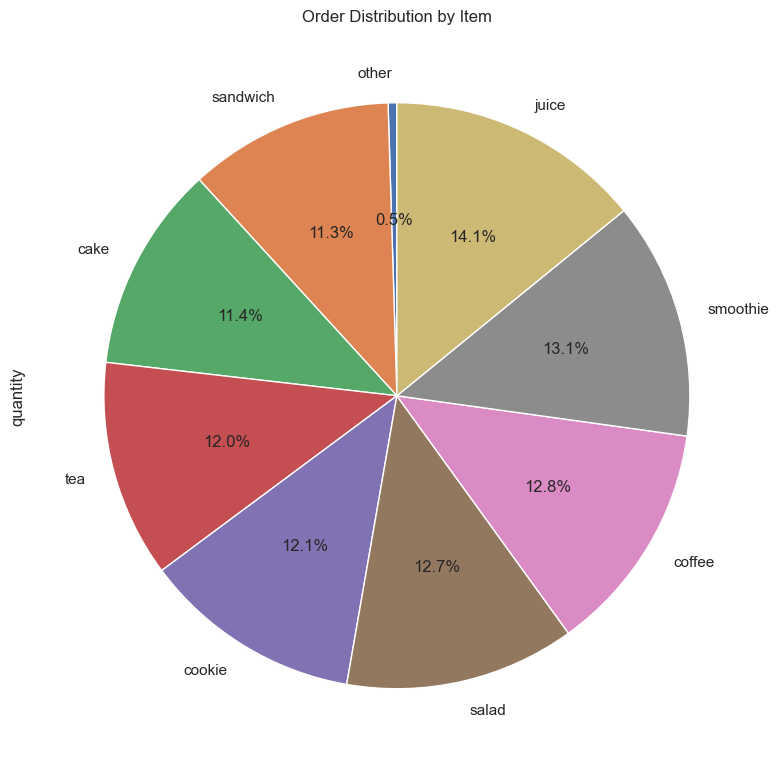

In [162]:
plt.figure(figsize=(8, 8))
item_quantity.sort_values().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Order Distribution by Item')
plt.tight_layout()
plt.show()


In [ ]:
# Sort values
item_quantity_sorted = item_quantity.sort_values(ascending=False)
# Get top 3 items
top_3 = item_quantity_sorted.head(3).index


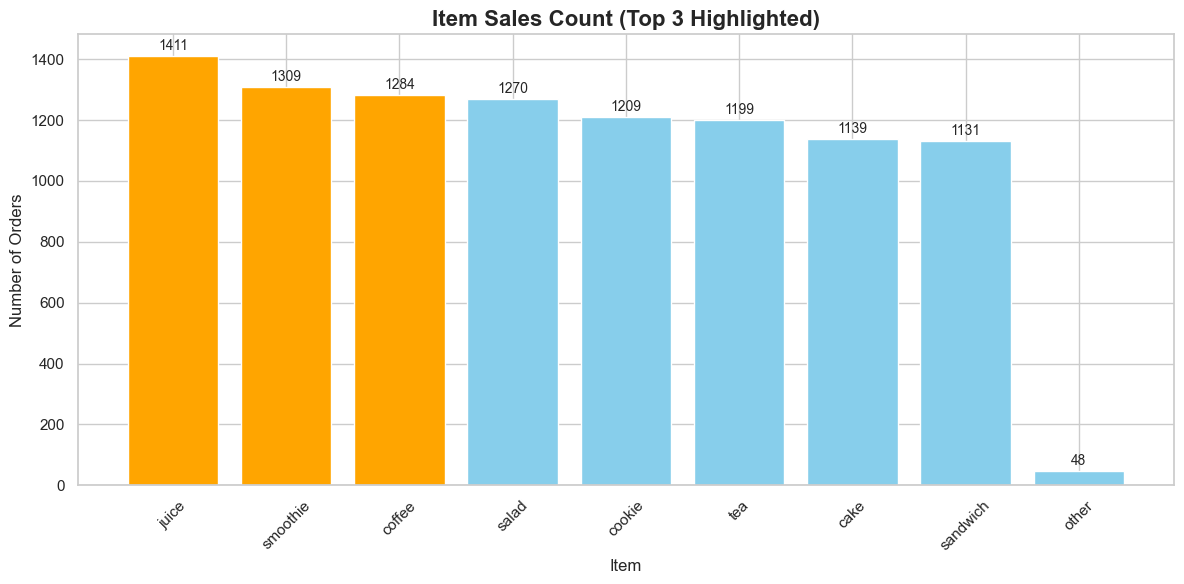

In [167]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

colors = [
    'orange' if item in top_3 else 'skyblue'
    for item in item_quantity_sorted.index
]

bars = plt.bar(
    item_quantity_sorted.index,
    item_quantity_sorted.values,
    color=colors
)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Item Sales Count (Top 3 Highlighted)', fontsize=16, weight='bold')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Payment Details :payment_method
missing           3178
digital wallet    2291
credit card       2273
cash              2258
Name: count, dtype: int64

Location Details :location
missing     3961
takeaway    3022
in-store    3017
Name: count, dtype: int64



Text(0.5, 1.0, 'Payment Method Distribution by Location')

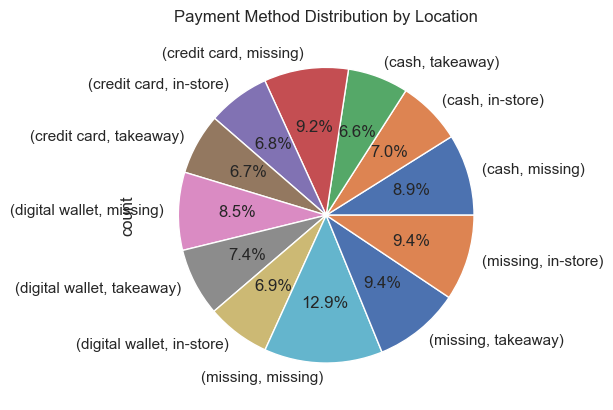

In [202]:
print(f"Payment Details :{df['payment_method'].value_counts()}\n")
print(f"Location Details :{df['location'].value_counts()}\n")

df.groupby('payment_method')['location'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Payment Method Distribution by Location')